<a href="https://colab.research.google.com/github/DsStudentSid/DL-Assignments/blob/master/Melanoma_Tumor_Size.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Table of Content**

To train a model using TF-Keras library and predict the melanoma tumor size

**Melanoma Tumor Size Dataset **

2.1 Get the Data

2.2 Clean the Data

2.3 Split the Data into Train and Test

2.4 Inspect the Data

2.5 Split Features from Labels

2.6 Normalize the Data

**The Model**

3.1 Build the Model

3.2 Inspect the Model

3.3 Train the Model

3.4 Make Predictions

**Model Tuning**

4.1 Increasing the Number of Hidden Layers and Hidden Units

4.2 Weight Regularization

4.3 Dropout

4.4 Combined L2 + Dropout

4.5 Batch Normalization

**Conclusion**

In [1]:
# Import tensorflow 2.x
# This code block will only work in Google Colab.
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

In [2]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.3.0


In [4]:
!pip install pandas_profiling==2.5.0

     |████████████████████████████████| 194kB 2.9MB/s 
     |████████████████████████████████| 10.4MB 8.0MB/s 
     |████████████████████████████████| 133kB 50.3MB/s 
     |████████████████████████████████| 614kB 35.0MB/s 
     |████████████████████████████████| 1.5MB 38.8MB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 61kB 7.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 276kB 50.4MB/s 
     |████████████████████████████████| 61kB 6.0MB/s 
     |████████████████████████████████| 327kB 39.5MB/s 
     |████████████████████████████████| 215kB 34.3MB/s 
     |████████████████████████████████| 102kB 10.3MB/s 
     |████████████████████████████████| 747kB 43.3MB/s 
     |████████████████████████████████| 61kB 6.3MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none-any.whl size=241329 sha256=9c75834434a8b2f48b0d927bfa50a420cfa99f9d04ce391744b86c43da9eb

In [3]:
import pathlib

import numpy as np
import pandas as pd
import pandas_profiling as p_p

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

!pip freeze |grep pandas-profiling


pandas-profiling==2.5.0


In [4]:
df_melanoma = pd.read_csv('https://raw.githubusercontent.com/DsStudentSid/DL-Assignments/master/melanoma_tumor_size.csv')
df_melanoma.head()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
0,6930.90,2919.02,0.42116,51.8298,9.888294e+05,109.487,2758.76,72,39.3620,14.103
1,15635.70,4879.36,0.31206,223.5500,2.058426e+06,248.881,5952.53,240,22.0253,2.648
2,10376.20,2613.88,0.25191,127.3370,1.434676e+06,160.093,4635.26,73,29.9963,1.688
3,13093.80,4510.06,0.34444,155.4400,1.812195e+06,173.015,5273.87,32,28.1354,3.796
4,7545.21,2882.36,0.38201,85.1237,1.043918e+06,124.414,3263.35,57,35.0200,18.023


In [5]:
df_melanoma.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9146 entries, 0 to 9145
Data columns (total 10 columns):
mass_npea         9146 non-null float64
size_npear        9146 non-null float64
malign_ratio      9146 non-null float64
damage_size       9146 non-null float64
exposed_area      9146 non-null float64
std_dev_malign    9146 non-null float64
err_malign        9146 non-null float64
malign_penalty    9146 non-null int64
damage_ratio      9146 non-null float64
tumor_size        9146 non-null float64
dtypes: float64(9), int64(1)
memory usage: 714.7 KB


In [6]:
df_melanoma.isna().sum()

mass_npea         0
size_npear        0
malign_ratio      0
damage_size       0
exposed_area      0
std_dev_malign    0
err_malign        0
malign_penalty    0
damage_ratio      0
tumor_size        0
dtype: int64

* We have total 9146 data records. no NULL values in any column. No catagorical records. entire dataset is continous numeric (float & int)

In [7]:
df_melanoma.nunique()


mass_npea         8847
size_npear        8859
malign_ratio      7386
damage_size       8861
exposed_area      8949
std_dev_malign    8802
err_malign        8831
malign_penalty     315
damage_ratio      8641
tumor_size        6511
dtype: int64

* just by looking at above numbers it feels that data is highlight co-related

In [8]:
df_melanoma.corr()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
mass_npea,1.000000,0.907335,0.123411,0.930691,0.998167,0.968006,0.617207,0.654849,-0.901106,-0.004679
size_npear,0.907335,1.000000,0.499398,0.794096,0.903502,0.907932,0.570343,0.593019,-0.791768,0.164761
malign_ratio,0.123411,0.499398,1.000000,0.029167,0.119389,0.196430,0.081228,0.102475,-0.068605,0.374273
damage_size,0.930691,0.794096,0.029167,1.000000,0.925266,0.938202,0.535834,0.676904,-0.892006,-0.163804
exposed_area,0.998167,0.903502,0.119389,0.925266,1.000000,0.962462,0.617149,0.646444,-0.900717,-0.003641
std_dev_malign,0.968006,0.907932,0.196430,0.938202,0.962462,1.000000,0.597842,0.667264,-0.884481,-0.030085
err_malign,0.617207,0.570343,0.081228,0.535834,0.617149,0.597842,1.000000,0.381454,-0.583945,0.004484
malign_penalty,0.654849,0.593019,0.102475,0.676904,0.646444,0.667264,0.381454,1.000000,-0.646893,0.011871
damage_ratio,-0.901106,-0.791768,-0.068605,-0.892006,-0.900717,-0.884481,-0.583945,-0.646893,1.000000,0.054892
tumor_size,-0.004679,0.164761,0.374273,-0.163804,-0.003641,-0.030085,0.004484,0.011871,0.054892,1.000000


In [9]:
df_melanoma.describe()

,mass_npea,size_npear,malign_ratio,damage_size,exposed_area,std_dev_malign,err_malign,malign_penalty,damage_ratio,tumor_size
count,9146.000000,9146.000000,9146.000000,9146.000000,9.146000e+03,9146.000000,9146.000000,9146.000000,9146.000000,9146.000000
mean,9903.052174,3032.827837,0.303083,103.902118,1.372442e+06,146.304239,3992.936256,69.849661,34.461652,7.723348
std,4060.577116,1462.334147,0.062533,55.456862,5.646773e+05,70.512177,1780.672859,55.785332,5.972808,6.086852
min,2864.760000,510.530000,0.114820,10.310100,3.878534e+05,31.970400,1089.190000,0.000000,15.228000,0.000000
25%,6988.420000,1983.657500,0.259053,64.012525,9.596873e+05,95.853900,3177.682500,31.000000,30.290225,2.320000
50%,8895.965000,2684.330000,0.301055,88.458300,1.237057e+06,126.138500,3846.320000,54.000000,35.245750,5.060500
75%,12119.950000,3830.745000,0.343002,134.209000,1.693083e+06,182.251500,4664.577500,91.000000,38.806075,13.336000
max,36995.400000,13535.000000,0.525300,346.420000,4.978616e+06,528.890000,91983.700000,340.000000,46.546400,20.999000


In [10]:
report = p_p.ProfileReport(df_melanoma)
#covert profile report as html file
report.to_file("Melanoma-EDA.html")


* EDA

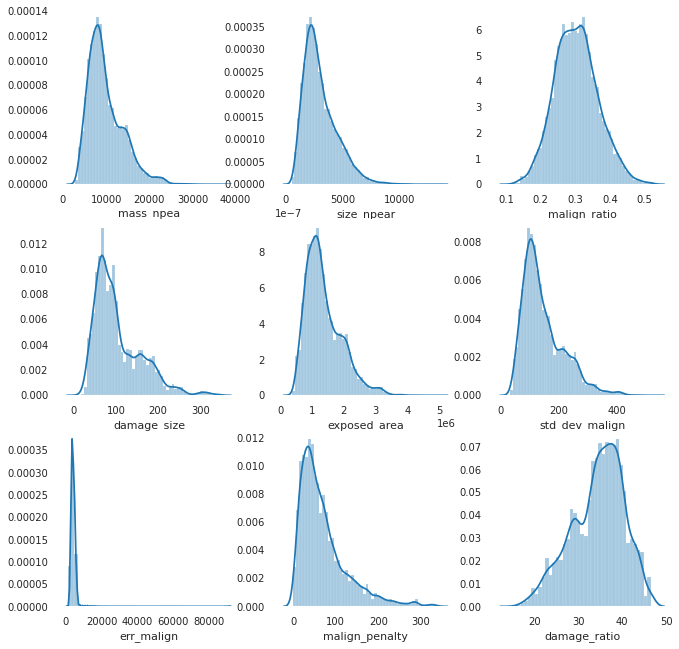

In [23]:
plt.figure(figsize=(11,11))
plt.subplot(3,3,1)
sns.distplot(df_melanoma.mass_npea)
plt.subplot(3,3,2)
sns.distplot(df_melanoma.size_npear)
plt.subplot(3,3,3)
sns.distplot(df_melanoma.malign_ratio)
plt.subplot(3,3,4)
sns.distplot(df_melanoma.damage_size)
plt.subplot(3,3,5)
sns.distplot(df_melanoma.exposed_area)
plt.subplot(3,3,6)
sns.distplot(df_melanoma.std_dev_malign)
plt.subplot(3,3,7)
sns.distplot(df_melanoma.err_malign)
plt.subplot(3,3,8)
sns.distplot(df_melanoma.malign_penalty)
plt.subplot(3,3,9)
sns.distplot(df_melanoma.damage_ratio)

Split the Data into Train and Test

*   We will split the dataset into a training (80%) and a test dataset (20%).
*   First we will train our model with training dataset and later we will use test dataset for evaluation





In [ ]:
melanoma_training_dataset = df_melanoma.sample(frac=0.8,random_state=0)

In [ ]:
melanoma_test_dataset = df_melanoma.drop(melanoma_training_dataset.index)